# t-sne

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

In [ ]:
X.shape

In [ ]:
pd.DataFrame(X).head()

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [ ]:
X_2d = tsne.fit_transform(X)

In [ ]:
mydata=pd.DataFrame(X_2d,columns=['X','Y'])

In [ ]:
mydata['digits']=y

In [ ]:
mydata

In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
sns.lmplot('X','Y',hue='digits',data=mydata,fit_reg=False)

# tsne on wine data

In [ ]:
wine=pd.read_csv(r'/Users/ed/Dropbox/Python/Dataset/Data/Data/winequality-white.csv',sep=";")

In [ ]:
wine.shape

In [ ]:
wine.head()

In [ ]:
X=scale(wine.iloc[:,:-1])

In [ ]:
X

In [ ]:
X_2d=tsne.fit_transform(X)

In [ ]:
mydata=pd.DataFrame(X_2d,columns=['X','Y'])

In [ ]:
mydata['quality']=wine['quality']

In [ ]:
sns.lmplot('X','Y',data=mydata,fit_reg=False)

In [ ]:
sns.lmplot('X','Y',hue='quality',data=mydata,fit_reg=False)

In [ ]:
mydata['quality'].value_counts()

# PCA

In [76]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA,FactorAnalysis
from sklearn.preprocessing import scale

In [77]:
file=r'/Users/ed/Dropbox/Python/Dataset/Data/Data/Existing Base.csv'

In [78]:
bd=pd.read_csv(file)

In [79]:
bd.shape

(10155, 32)

In [80]:
bd.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average Credit Card Transaction', 'Balance Transfer',
       'Term Deposit', 'Life Insurance', 'Medical Insurance',
       'Average A/C Balance', 'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
       'Revenue Grid', 'gender', 'region', 'Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative',
       'Portfolio Balance'],
      dtype='object')

In [81]:
bd=bd[['Average Credit Card Transaction', 'Balance Transfer',
       'Term Deposit', 'Life Insurance', 'Medical Insurance',
       'Average A/C Balance', 'Personal Loan', 'Investment in Mutual Fund',
       'Investment Tax Saving Bond', 'Home Loan', 'Online Purchase Amount',
        'Investment in Commudity',
       'Investment in Equity', 'Investment in Derivative',
       'Portfolio Balance']]

In [82]:
bd.corr()

,Average Credit Card Transaction,Balance Transfer,Term Deposit,Life Insurance,Medical Insurance,Average A/C Balance,Personal Loan,Investment in Mutual Fund,Investment Tax Saving Bond,Home Loan,Online Purchase Amount,Investment in Commudity,Investment in Equity,Investment in Derivative,Portfolio Balance
Average Credit Card Transaction,1.000000,0.123855,0.323462,0.145041,0.405090,0.172240,0.087289,0.150667,0.133126,0.087695,0.132518,0.497025,0.205289,0.228141,0.335674
Balance Transfer,0.123855,1.000000,0.229457,0.564538,0.162085,0.358938,0.351499,0.454602,0.166496,0.153097,0.112012,0.739791,0.463556,0.581039,0.639400
Term Deposit,0.323462,0.229457,1.000000,0.274691,0.506367,0.274027,0.146755,0.208948,0.176975,0.170584,0.099455,0.620256,0.266908,0.354304,0.454740
Life Insurance,0.145041,0.564538,0.274691,1.000000,0.238435,0.514339,0.380563,0.544439,0.263675,0.279959,0.128785,0.803326,0.564287,0.839266,0.787311
Medical Insurance,0.405090,0.162085,0.506367,0.238435,1.000000,0.264615,0.105134,0.209651,0.201057,0.136310,0.149651,0.548282,0.269922,0.392548,0.441631
Average A/C Balance,0.172240,0.358938,0.274027,0.514339,0.264615,1.000000,0.219801,0.448270,0.307552,0.367590,0.162821,0.517832,0.600278,0.657742,0.616051
Personal Loan,0.087289,0.351499,0.146755,0.380563,0.105134,0.219801,1.000000,0.379615,0.233020,0.128062,0.073292,0.377170,0.676053,0.687417,0.598919
Investment in Mutual Fund,0.150667,0.454602,0.208948,0.544439,0.209651,0.448270,0.379615,1.000000,0.271580,0.261562,0.115087,0.536715,0.693435,0.761125,0.695337
Investment Tax Saving Bond,0.133126,0.166496,0.176975,0.263675,0.201057,0.307552,0.233020,0.271580,1.000000,0.261626,0.211596,0.289110,0.446271,0.407148,0.395889
Home Loan,0.087695,0.153097,0.170584,0.279959,0.136310,0.367590,0.128062,0.261562,0.261626,1.000000,0.101066,0.268989,0.348181,0.335651,0.326663


In [83]:
import seaborn as sns
%matplotlib inline

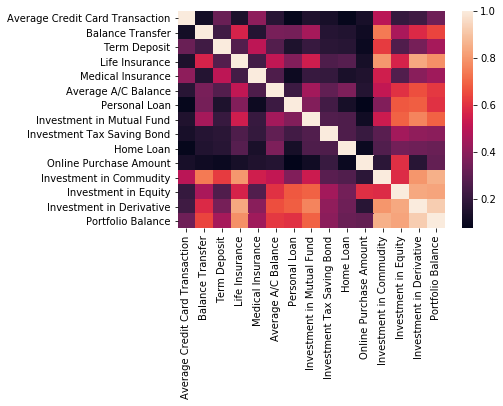

In [84]:
sns.heatmap(bd.corr())

In [85]:
bd.shape

(10155, 15)

In [86]:
X=bd.copy()

In [87]:
X = scale(X)

In [88]:
pca = PCA(n_components=15)

In [89]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=15, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [90]:
pca.components_

array([[ 1.38519523e-01,  2.51914540e-01,  1.88417476e-01,
         3.04607540e-01,  1.82510270e-01,  2.58260897e-01,
         2.24513067e-01,  2.77210354e-01,  1.74420241e-01,
         1.52766829e-01,  1.21072307e-01,  3.40703395e-01,
         3.29225771e-01,  3.65017102e-01,  3.68347115e-01],
       [-4.88608479e-01,  7.44901633e-02, -4.76410887e-01,
         9.36614508e-02, -5.08504340e-01,  5.26391563e-02,
         2.84311540e-01,  1.92269168e-01,  6.19345939e-02,
         5.87040971e-02,  4.00182080e-02, -2.47299192e-01,
         2.27890747e-01,  1.35880508e-01,  1.96728973e-02],
       [ 9.92402137e-02, -3.38650619e-01, -2.40778241e-02,
        -2.51354679e-01,  9.28872328e-02,  7.39089017e-02,
        -7.57792946e-02, -9.24865107e-02,  3.92044037e-01,
         2.29065734e-01,  6.57231934e-01, -2.07369984e-01,
         2.99511084e-01, -1.06139426e-01, -3.49738696e-02],
       [ 1.55828400e-01,  1.29429526e-01, -4.69731932e-02,
        -7.39316085e-02,  1.32066879e-02, -3.48621577

In [91]:
pca.components_.shape

(15, 15)

In [92]:
var= pca.explained_variance_ratio_

print(var)

[4.57760905e-01 1.06815789e-01 8.37682574e-02 6.76590833e-02
 5.51515528e-02 4.60704467e-02 4.47954686e-02 4.13678442e-02
 3.33620268e-02 3.13826959e-02 2.73470603e-02 4.51886955e-03
 3.16261746e-10 2.47789450e-10 1.75773727e-10]


In [93]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

[ 45.78  56.46  64.84  71.61  77.13  81.74  86.22  90.36  93.7   96.84
  99.57 100.02 100.02 100.02 100.02]


In [94]:
pca = PCA(n_components=11)

In [95]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [96]:
pca.components_.shape

(11, 15)

In [97]:
X1=pd.DataFrame(pca.transform(X))

In [98]:
X1

,0,1,2,3,4,5,6,7,8,9,10
0,0.869774,-0.792852,-0.300362,0.463627,0.016042,0.368796,-2.804879,0.659902,0.076150,0.546220,0.309983
1,-1.763740,0.271868,-0.529384,0.342982,0.391251,-0.243377,-0.136108,0.514181,0.008195,-0.106689,0.244363
2,2.759896,0.575463,-1.617375,-0.904037,2.031229,-0.561042,-0.315313,-0.826448,2.165835,-0.664759,-0.131263
3,-1.682247,0.607132,0.003920,-0.086971,0.092131,0.192318,0.067067,-0.697390,0.119397,0.299323,0.119600
4,3.433527,0.456228,0.402857,-2.512890,0.613241,2.756212,0.126809,0.513503,-2.382016,-0.410804,-0.479994
...,...,...,...,...,...,...,...,...,...,...,...
10150,-1.899811,0.293824,0.006565,0.168493,-0.237207,-0.196357,-0.017735,0.018811,-0.043481,-0.158994,-0.239538
10151,-0.066473,0.426890,-1.451677,0.350205,0.974095,-0.532417,-0.434767,0.607950,0.045247,-0.582694,-0.906420
10152,-0.545130,-2.975703,0.119935,0.679196,-0.676347,0.778288,-0.265276,-0.153630,-0.251452,-0.752468,0.172400
10153,-1.966918,0.371118,-0.019106,-0.272167,0.169842,0.239058,0.150698,0.583076,-0.224180,-0.032177,0.217751


### individual pc loadings

In [106]:
# pc1

loadings=pca.components_[10]
loadings

array([-3.92333819e-02,  5.73444699e-01, -9.64113555e-02, -6.67049198e-01,
        2.38007301e-01,  3.14205767e-01,  9.72905695e-02,  5.98366153e-02,
       -3.51433410e-04,  1.61667080e-02, -1.03985639e-01, -8.61330898e-02,
        8.96086360e-02, -1.26574260e-01, -6.64030363e-02])

In [102]:
list(zip(bd.columns,loadings))

[('Average Credit Card Transaction', -0.48860847891174614),
 ('Balance Transfer', 0.07449016328622181),
 ('Term Deposit', -0.47641088687351413),
 ('Life Insurance', 0.0936614507880239),
 ('Medical Insurance', -0.5085043397663267),
 ('Average A/C Balance', 0.05263915628379902),
 ('Personal Loan', 0.28431154013490906),
 ('Investment in Mutual Fund', 0.192269168370127),
 ('Investment Tax Saving Bond', 0.061934593902195294),
 ('Home Loan', 0.058704097146322506),
 ('Online Purchase Amount', 0.04001820799124719),
 ('Investment in Commudity', -0.24729919204447523),
 ('Investment in Equity', 0.22789074687192298),
 ('Investment in Derivative', 0.13588050787142117),
 ('Portfolio Balance', 0.019672897326558643)]

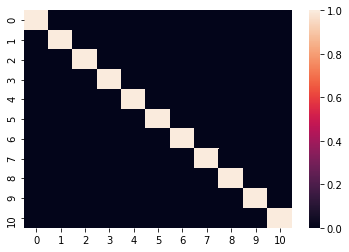

In [107]:
sns.heatmap(X1.corr())